In [1]:
import yfinance as yf 
from make_data import make_data

SP500 = yf.download('SPY', keepna = True )
data = make_data(SP500)

data.to_csv('example.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
data

,Open,High,Low,Close,Adj Close,Volume,SMA5,SMA7,SMA14,SMA30,...,ForceIndex14,ForceIndex30,ForceIndex60,ForceIndex90,EMV5,EMV7,EMV14,EMV30,EMV60,EMV90
Date,,,,,,,,,,,,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.122341,1003200,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.301023,480500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.354609,201300,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.622654,529400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.729855,531500,25.426096,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-15,385.890015,389.489990,383.709991,389.279999,387.799957,172996900,387.289905,390.086945,393.683929,401.023491,...,-1.961219e+09,-2.964235e+09,2.466188e+08,2.778715e+09,-13.359853,-15.584410,-3.910942,-1.385461,1.376064,1.709224
2023-03-16,386.820007,396.470001,386.290009,396.109985,394.603973,143254200,388.196442,389.779545,393.664716,400.535686,...,-3.853279e+07,-2.096404e+09,1.832389e+09,3.824028e+09,-2.369991,-6.479096,-0.583786,-1.874715,2.539991,2.790587
2023-03-17,393.220001,394.399994,388.549988,389.989990,389.989990,140047400,389.305884,388.720498,393.219870,399.695506,...,-8.721934e+08,-3.529953e+09,1.598617e+09,2.350645e+09,4.501618,-4.633507,-1.996587,-3.212026,2.865640,2.515056


In [ ]:
!python DWT.py

In [ ]:
data

## Test CWT and Fourier

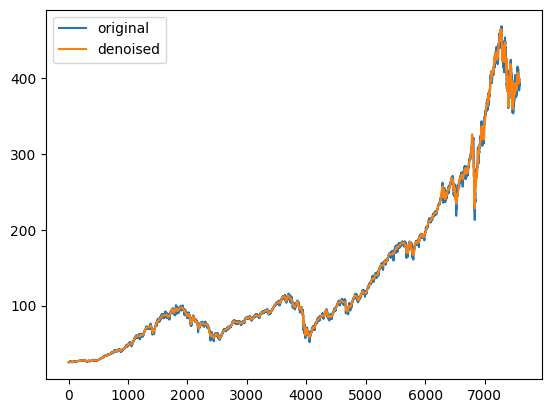

check the example.png created by this file


In [3]:
from CWT import CWT
from DWT import discrete_wavelet_denoise, log_return
from Short_time_fourier import STFourier 

In [4]:
k = 360
sample =  data['Adj Close'][:k].to_numpy()
sample_denoised = discrete_wavelet_denoise (sample , wavelet = 'db4', level = 2)
log_ret = log_return(sample_denoised)

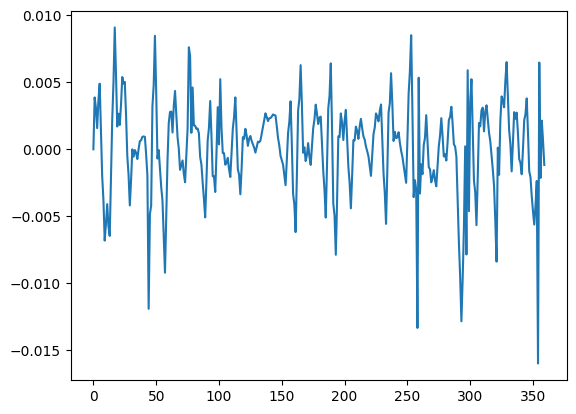

In [10]:
plt.plot(log_ret)

In [14]:
from statsmodels.tsa.stattools import adfuller
adfuller(log_ret)

(-5.647474213615639,
 1.0036414906609396e-06,
 9,
 350,
 {'1%': -3.4491725955218655,
  '5%': -2.8698334971428574,
  '10%': -2.5711883591836733},
 -3128.6998810416208)

Text(42.722222222222214, 0.5, 'Frequency')

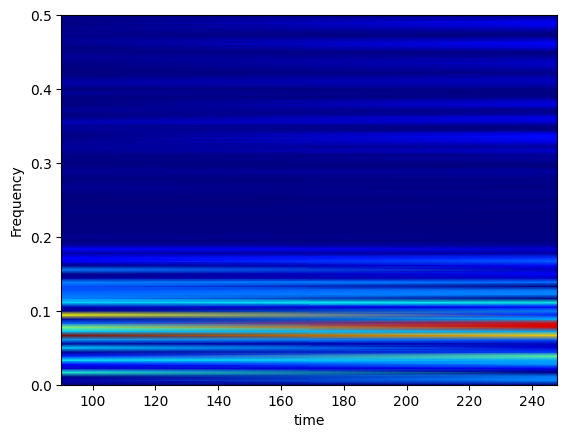

In [7]:

STFourier (log_ret, show = True)


In [ ]:
import os 
kwargs = {'b' : 2., 'c' : 1. }
CWT (log_ret,show = True, wavelet = 'cmor',path= 'scalo.png', **kwargs  )

##  Generation de NN datasets

In [16]:
from pipeline import *

[*********************100%***********************]  1 of 1 completed


  0%|                                                                                          | 0/947 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 2 is too high: all coefficients will experience boundary effects.
  warnings.warn(


ok


  0%|▎                                                                                 | 3/947 [00:00<02:36,  6.03it/s]

ok
ok
ok
ok


  1%|▌                                                                                 | 7/947 [00:00<01:31, 10.24it/s]

ok
ok
ok


  1%|▊                                                                                 | 9/947 [00:01<01:21, 11.54it/s]

ok
ok
ok


  1%|█                                                                                | 13/947 [00:01<01:39,  9.41it/s]

ok
ok


  2%|█▎                                                                               | 15/947 [00:01<01:31, 10.23it/s]

ok
ok
ok


  2%|█▍                                                                               | 17/947 [00:01<01:28, 10.46it/s]

ok
ok
ok


  2%|█▊                                                                               | 21/947 [00:02<01:29, 10.29it/s]

ok
ok
ok
ok


  3%|██                                                                               | 24/947 [00:02<01:39,  9.30it/s]

ok
ok


  3%|██▏                                                                              | 26/947 [00:02<01:47,  8.60it/s]

ok
ok


  3%|██▍                                                                              | 28/947 [00:03<01:59,  7.71it/s]

ok
ok


  3%|██▌                                                                              | 30/947 [00:03<02:07,  7.21it/s]

ok
ok


  3%|██▋                                                                              | 32/947 [00:03<02:08,  7.10it/s]

ok
ok


  3%|██▊                                                                              | 33/947 [00:03<02:08,  7.09it/s]

ok


  4%|██▉                                                                              | 35/947 [00:04<02:37,  5.78it/s]

ok
ok


  4%|███                                                                              | 36/947 [00:04<01:55,  7.88it/s]


ok


KeyboardInterrupt: 

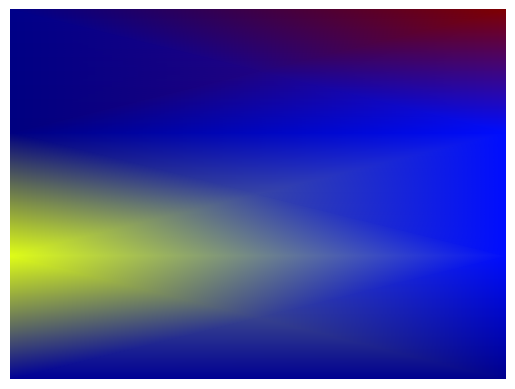

In [8]:
import yfinance as yf 
from make_data import make_data

SP500 = yf.download('SPY', keepna = True )
data = make_data(SP500)
signal = data['Adj Close'].to_numpy()
window_size = 14
level_discrete_wavelet_transform = 2
kwargs = {'b' : 2., 'c' : 1. }


generate_NN_dataset(
    signal ,
    window_size,
    fourier = True,
    denoising_method = 'dwt',
    method_labels = 'mean',
    window_ssa = 5,
    thresh = 0.9,
    jump = 8,
    level_discrete_wavelet_transform = level_discrete_wavelet_transform,
    discrete_wavelet = 'db4',
    continuous_wavelet = 'cmor',
    **kwargs 
    )

In [ ]:


generate_NN_dataset(
    signal ,
    window_size,
    denoising_method = 'ssa',
    method_labels = 'mean',
    window_ssa = 5,
    thresh = 0.9,
    jump = 8,
    level_discrete_wavelet_transform = level_discrete_wavelet_transform,
    discrete_wavelet = 'db4',
    continuous_wavelet = 'cmor',
    **kwargs 
    )

## Test multithread

In [17]:
!python multithread.py --w 360 --jump 10 --level 3 --method dwt --fourier True


100%|##########| 154/154 [06:17<00:00,  2.45s/it]

100%|##########| 154/154 [06:24<00:00,  2.50s/it]

100%|##########| 154/154 [06:16<00:00,  2.44s/it]

100%|##########| 154/154 [06:12<00:00,  2.42s/it]



[*********************100%***********************]  1 of 1 completed
Figure(640x480)
check the example.png created by this file

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Figure(640x480)
check the example.png created by this file

[*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed
Figure(640x480)
check the example.png created by this file

[*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed
Figure(640x480)
check the example.png created by this file

[*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed
Figure(640x480)
check the example.png created by this file

[*********************100%***********************]  1 of 1 completed



In [12]:
!python multithread.py --w 180 --jump 10 --w_ssa 50 --thresh 0.9 --method ssa --fourier True


100%|##########| 172/172 [2:01:56<00:00, 42.54s/it]

100%|##########| 172/172 [2:02:07<00:00, 42.60s/it]

100%|##########| 172/172 [2:02:06<00:00, 42.60s/it]

100%|##########| 172/172 [2:02:05<00:00, 42.59s/it]



[*********************100%***********************]  1 of 1 completed
Figure(640x480)
check the example.png created by this file

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Figure(640x480)
check the example.png created by this file

[*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed
Figure(640x480)
check the example.png created by this file

[*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed
Figure(640x480)
check the example.png created by this file

[*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed
Figure(640x480)
check the example.png created by this file

[*********************100%***********************]  1 of 1 completed



## Test train 

In [ ]:
!python train.py --data 30 --in_channel 3 --eval --cv 4